# Inicializar el circuito

- cqr = Registro cuantico de control
- tqr = Registro cuántico objetivo
- cux2 = Circuito cuántico con ambos, donde se realiza la primera parte del  circuito sin mediciones ni el QFT en el registro de control \
cz: Controlled-Z gate. Se aplica entre 2 qubits, uno de control y un objetivo. El qubit objetivo cambia de fase(Phase Flip) si es que el qubit de control se encuentra en el estado |1>, si está en |0> entonces se mantiene.

CZ|00> = |00> (Control qubit is |0>, no change) \
CZ|01> = |01> (Control qubit is |0>, no change) \
CZ|10> = |10> (Control qubit is |1>, no change to target qubit |0>) 'No existe -0' \
CZ|11> = -|11> (Control qubit is |1>, phase flip applied to target qubit |1>)  \


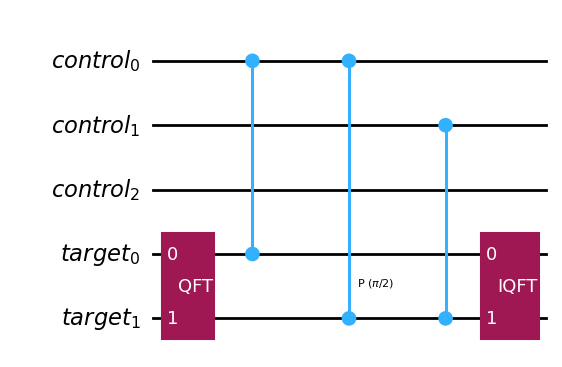

In [9]:
import numpy as np
from qiskit.circuit.library import QFT
from qiskit import QuantumCircuit,QuantumRegister

cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux2 = QuantumCircuit(cqr, tqr)
cux2.append(QFT(2, do_swaps=False), [3, 4])
cux2.cz(0, 3)
cux2.cp(np.pi/2, 0, 4)
cux2.cz(1, 4)
cux2.append(QFT(2, inverse=True, do_swaps=False), [3, 4])

cux2.draw('mpl', fold=100)

- cqr = Registro clásico de 3 bits donde se almacena el output
- Shor = El circuito entero, comienza recibiendo los registros anteriores y agrega una hadamard a los registros de control. Luego de la controlled Z gate, agrega una QFT y se miden todas

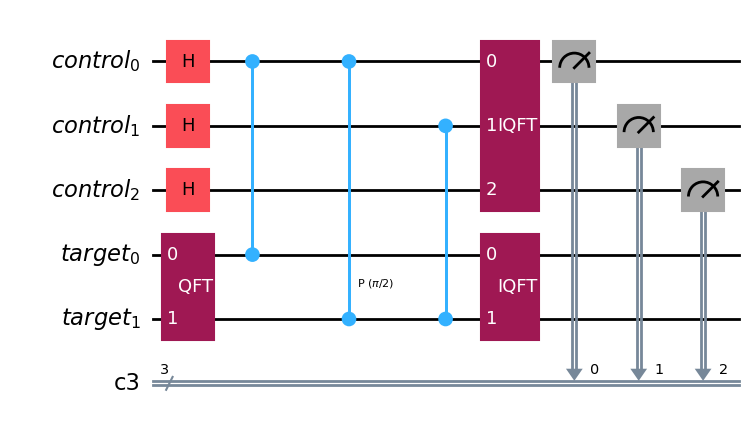

In [10]:
from qiskit.circuit.library import QFT
from qiskit import ClassicalRegister
cr = ClassicalRegister(3)
shor_circuit = QuantumCircuit(cqr, tqr, cr)
shor_circuit.h(cqr)

shor_circuit.compose(cux2, inplace=True)

shor_circuit.append(QFT(3, inverse=True, do_swaps=True), cqr)
shor_circuit.measure(cqr, cr)
shor_circuit.draw('mpl')

C3 es la medición, ese es el output que buscamos
** Shor no funciona con numeros pares y menores de 15